# Airbnb Los Angeles Data

## Overview

Airbnb data was gathered from the website(http://insideairbnb.com/get-the-data.html) about its Los Angeles data.  In this notebook we will clean, model, analyze and visualize the data in order to provide insight into the Airbnb Los Angeles activity.

## Purpose

We want to find out what increases or decreases price of the unit, occupancy ratio, and review scores.  We will attempt to answer the following questions.

-  What factors effect price of the unit?
-  Does the price change based on season?
-  What factors effect occupancy ratio of the unit?
-  What factors effect review score of the unit?

In [2]:
# Load modules
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


## Data Gathering

Airbnb Los Angeles data was downloaded manually from the Airbnb website provided(http://insideairbnb.com/get-the-data.html).  Listings, Calendar, and Reviews files were manually decompressed prior to loading.  First we will load the data.

In [3]:
# pull data

df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods.csv')

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Assesment

Here we will asses each data set to determine a cleaing plan.

### Calendar Data Assesment

First we will take a look at the data.

In [4]:
# Check data
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,2019-03-07,f,$118.00,$118.00,30.0,730.0
1,67792,2019-03-07,f,$350.00,$350.00,30.0,365.0
2,67792,2019-03-08,f,$350.00,$350.00,30.0,365.0
3,67792,2019-03-09,f,$350.00,$350.00,30.0,365.0
4,67792,2019-03-10,f,$350.00,$350.00,30.0,365.0


In [5]:
# check for null values
df_calendar.isnull().sum()

listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      8
maximum_nights      8
dtype: int64

### Calendar Cleaning Plan

-  Remove `$` from `price` and `adjusted_price`
-  Remove any `null` 
-  Add a column that converts date to days from the first date
-  Create stats for each `day` containing mean, 25, 50, and 75 percentiles.
-  Create a statistic for occupancy ratio for each `listing_id`

### Listing Data Assesment

First we will check the data to determine methods for cleaning.

In [8]:
# Check data
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20190306202210,2019-03-07,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20190306202210,2019-03-07,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.12
2,2708,https://www.airbnb.com/rooms/2708,20190306202210,2019-03-07,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.26
3,2732,https://www.airbnb.com/rooms/2732,20190306202210,2019-03-07,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20190306202210,2019-03-06,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [9]:
#Check for duplicate id's for 109
sum(df_listings['id'].duplicated())

0

In [10]:
# see null values greater than 75%
df_listings.isnull().sum()[df_listings.isnull().sum()/df_listings.shape[0]>.75]

thumbnail_url                   43196
medium_url                      43196
xl_picture_url                  43196
host_acceptance_rate            43196
neighbourhood_group_cleansed    43196
square_feet                     42855
weekly_price                    37855
monthly_price                   38294
license                         42415
dtype: int64

### Listing Cleaning plan

-  Remove '$' from columns 'price', 'cleaning_fee', 'extra_people', 'security_deposit'
-  Remove '%' from 'host_response_rate'
-  Remove ', California, United States' from 'host_location'
    -  This will help during data analysis to reduce clutter
-  Remove all columns with >0.75 null values. ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license']
-  Remove columns that are identifiers of the specific owner. ['listing_url', 'scrape_id', 'name', 'host_id', 'host_name'] (`id` will be used later to merge dataframes)
    -  This data will be removed because it appears to be specific to each host and can be used as an identifier.  If left in it would have a negative impact on modeling.
-  Convert date column ['host_since'] into day columns
-  Remove date columns ['calendar_last_scraped', 'calendar_updated']
    - These columns are related to when data was pulled by Airbnb and not related to hosts.
-  Remove other columns that may not be useful ['access', 'amenities', 'country', 'country_code', 'description', 'experiences_offered', 'first_review', 'host_about', 'host_url', 'host_verifications', 'house_rules', 'interaction', 'jurisdiction_names', 'last_review', 'last_scraped', 'neighborhood_overview', 'notes', 'picture_url', 'space', 'state', 'street', 'summary', 'transit','host_thumbnail_url', 'host_picture_url']
    - These columns are mostly either a duplicate form of data, text description, identifiers, or unuseful data.  
-  'zipcode' needs to be object


In [13]:
#check null counts
df_listings.isnull().sum()[df_listings.isnull().sum()>0]

name                                5
summary                          1673
space                           11365
description                       898
neighborhood_overview           15007
notes                           21215
transit                         16684
access                          15968
interaction                     16086
house_rules                     13147
thumbnail_url                   43196
medium_url                      43196
xl_picture_url                  43196
host_name                           4
host_since                          4
host_location                     161
host_about                      14851
host_response_time               8236
host_response_rate               8236
host_acceptance_rate            43196
host_is_superhost                   4
host_thumbnail_url                  4
host_picture_url                    4
host_neighbourhood               8087
host_listings_count                 4
host_total_listings_count           4
host_has_pro

### Missing Values

Depending on the data we will impute missing values using mean and mode.

-  Mean: 'security_deposit', 'cleaning_fee'
-  Mode: 'host_since', 'host_location', 'host_is_superhost', 'host_thumbnail_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'zipcode', 'market', 'host_reponse_time', 'host_reponse_rate', 'bathrooms', 'beds', 'reviews_per_month'
-  We will remove rows with null values missing price as it is our prediction value.

### Review Data Assesment
First we will check the data to determine methods for cleaning.

In [14]:
# Read data and check
df_reviews.head()

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,344,2016-06-14
3,344,2016-12-30
4,344,2018-08-28


In [15]:
#check nulls
df_reviews.isnull().sum()

listing_id    0
date          0
dtype: int64

### Review Cleaning Plan

-  Use date to create a `days` column.

### Neighbourhood Data Assesment

-  First we will check the data to determine methods for cleaning.

In [16]:
# Pull data and check layout
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Acton
1,NaN,Adams-Normandie
2,NaN,Agoura Hills
3,NaN,Agua Dulce
4,NaN,Alhambra


In [17]:
#Check for null values
df_neighbourhoods.isnull().sum()

neighbourhood_group    272
neighbourhood            0
dtype: int64

### Neighbourhood Cleaning Plan
-  Drop `neighbourhood_group` column

## Data Cleaning

Here we will execute the cleaning plan for each data set outlinded in the previous section.

### Calendar Cleaning Plan

-  Remove `$` from `price` and `adjusted_price`
-  Remove any `null` 
-  Add a column that converts date to days from the first date
-  Create stats for each `day` containing mean, 25, 50, and 75 percentiles.
-  Create a statistic for occupancy ratio for each `listing_id`

#### Drop null rows

In [20]:
#Drop rows with null values
df_calendar_new = df_calendar.dropna()

In [21]:
#Check for null values
df_calendar_new.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

#### Remove `$` from `price` and `adjusted_price`

In [22]:
# remove $ from price and adjusted price
df_calendar_new['price'] = df_calendar_new['price'].str.strip('$').convert_objects(convert_numeric=True)
df_calendar_new['adjusted_price'] = df_calendar_new['adjusted_price'].str.strip('$').convert_objects(convert_numeric=True)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anac

In [23]:
# Check for removed '$'
df_calendar_new.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,2019-03-07,f,118.0,118.0,30.0,730.0
1,67792,2019-03-07,f,350.0,350.0,30.0,365.0
2,67792,2019-03-08,f,350.0,350.0,30.0,365.0
3,67792,2019-03-09,f,350.0,350.0,30.0,365.0
4,67792,2019-03-10,f,350.0,350.0,30.0,365.0


#### Create a column that converts date to days from the first date

In [24]:
#Convert date to days from first date

#Create first date
first_date = datetime.date(2019,3,6)
first_date

#Create empty list to append days
days_list = []

#for each date: find number of days from first date and append to list
for date in df_calendar_new['date']:
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    day = int(day)
    cal_date = datetime.date(year,month,day)
    delta_days = cal_date - first_date
    days_list.append(delta_days.days)
    
#Append list to dataframe
df_calendar_new['days'] = days_list

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
# Check changes
df_calendar_new.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,days
0,109,2019-03-07,f,118.0,118.0,30.0,730.0,1
1,67792,2019-03-07,f,350.0,350.0,30.0,365.0,1
2,67792,2019-03-08,f,350.0,350.0,30.0,365.0,2
3,67792,2019-03-09,f,350.0,350.0,30.0,365.0,3
4,67792,2019-03-10,f,350.0,350.0,30.0,365.0,4


#### Create stats for each `day` containing mean, 25, 50, and 75 percentiles.

In [26]:
#Find mean 25/50/75 percentiles for each day
daily_mean = []
daily_25 = []
daily_50 = []
daily_75 = []


for day in list(range(365)):
    daily_mean.append(df_calendar_new[df_calendar_new['days']==day]['price'].mean())
    daily_25.append(df_calendar_new[df_calendar_new['days']==day]['price'].describe()['25%'])
    daily_50.append(df_calendar_new[df_calendar_new['days']==day]['price'].describe()['50%'])
    daily_75.append(df_calendar_new[df_calendar_new['days']==day]['price'].describe()['75%'])


# convert lists to dataframe

daily_stats = pd.DataFrame({'Mean':daily_mean,
                          '25th':daily_25,
                          '50th':daily_50,
                          '75th':daily_75})
    
#Check data    
daily_stats.head()

#Save for later use
daily_stats.to_csv('daily_stats.csv')

#### Create a statistic for occupancy ratio for each `listing_id`

In [27]:
# Get all id's from listing_id
list_ids=[]

unique_ids = df_calendar_new.duplicated('listing_id')==False
for row in list(range(len(df_calendar_new['listing_id']))):
    try:
        if unique_ids[row] == True:
            list_ids.append(df_calendar_new['listing_id'][row])
    except:
        pass
list_ids[0:5]     

[109, 67792, 23710, 23925, 67837]

In [28]:
# Determine occupancy ratio for each listing_id
occupancy_ratio = []
for unit_id in list_ids:
    ratio = sum(df_calendar_new['available'][df_calendar_new['listing_id']==unit_id]=='f')/df_calendar_new[df_calendar_new['listing_id']==unit_id].shape[0]
    occupancy_ratio.append(ratio)

In [33]:
# create df with corresponding listing_id and occupancy ratio

# Convert to series
occupancy_ratio = pd.Series(occupancy_ratio)

# Convert to dataframe with id's
df_occupancy_ratio = pd.DataFrame({'id':list_ids,
                                   'occupancy_ratio':occupancy_ratio})

df_occupancy_ratio.head()

,id,occupancy_ratio
0,109,1.000000
1,67792,0.320548
2,23710,0.660274
3,23925,0.200000
4,67837,0.000000


### Listing Cleaning plan

-  Remove '$' from columns 'price', 'cleaning_fee', 'extra_people', 'security_deposit'
-  Remove '%' from 'host_response_rate'
-  Remove ', California, United States' from 'host_location'
    -  This will help during data analysis to reduce clutter
-  Remove all columns with >0.75 null values. ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license']
-  Remove columns that are identifiers of the specific owner. ['listing_url', 'scrape_id', 'name', 'host_id', 'host_name'] (`id` will be used later to merge dataframes)
    -  This data will be removed because it appears to be specific to each host and can be used as an identifier.  If left in it would have a negative impact on modeling.
-  Convert date column ['host_since'] into day columns
-  Remove date columns ['calendar_last_scraped', 'calendar_updated']
    - These columns are related to when data was pulled by Airbnb and not related to hosts.
-  Remove other columns that may not be useful ['access', 'amenities', 'country', 'country_code', 'description', 'experiences_offered', 'first_review', 'host_about', 'host_url', 'host_verifications', 'house_rules', 'interaction', 'jurisdiction_names', 'last_review', 'last_scraped', 'neighborhood_overview', 'notes', 'picture_url', 'space', 'state', 'street', 'summary', 'transit','host_thumbnail_url', 'host_picture_url']
    - These columns are mostly either a duplicate form of data, text description, identifiers, or unuseful data.  
-  'zipcode' needs to be object
-  We will remove rows with any missing review score data.  
    - I believe review scores will directly effect the price or be affected by the price.  


#### Remove '$' from columns 'price', 'cleaning_fee', 'extra_people', 'security_deposit'

In [34]:
# Remove $ from columns
df_listings['price'] = df_listings['price'].str.strip('$').convert_objects(convert_numeric=True)
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.strip('$').convert_objects(convert_numeric=True)
df_listings['extra_people'] = df_listings['extra_people'].str.strip('$').convert_objects(convert_numeric=True)
df_listings['security_deposit'] = df_listings['security_deposit'].str.strip('$').convert_objects(convert_numeric=True)
#Check
df_listings['price'].head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
E:\Anaco

0    122.0
1    168.0
2     79.0
3    140.0
4     80.0
Name: price, dtype: float64

#### Remove '%' from 'host_response_rate'

In [35]:
# remove % from host_response_rate
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.strip('%').convert_objects(convert_numeric=True)

#check for removal
df_listings['host_response_rate'].head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


0    100.0
1     67.0
2    100.0
3    100.0
4      NaN
Name: host_response_rate, dtype: float64

#### Remove ', California, United States' from 'host_location'

In [36]:
# remove , California, United States' from 'host_location from `host_location`
df_listings['host_location'] = df_listings['host_location'].str.strip(', California, United States')

# check for removal
df_listings['host_location'].head()

0      Francisc
1       Burbank
2       Los Ang
3         Monic
4    Long Beach
Name: host_location, dtype: object

#### Remove columns
 -  Remove all columns with >0.75 null values
 -  Remove columns that are identifiers of the specific owner. ['listing_url', 'scrape_id', 'name', 'host_id', 'host_name'] (`id` will be used later to merge dataframes)
 -  Remove other columns that may not be useful ['access', 'amenities', 'country', 'country_code', 'description', 'experiences_offered', 'first_review', 'host_about', 'host_url', 'host_verifications', 'house_rules', 'interaction', 'jurisdiction_names', 'last_review', 'last_scraped', 'neighborhood_overview', 'notes', 'picture_url', 'space', 'state', 'street', 'summary', 'transit','host_thumbnail_url', 'host_picture_url']
 -  Remove date columns ['calendar_last_scraped', 'calendar_updated']

In [37]:
#Drop columns with >75% null values
df_listings = df_listings.drop(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license'], axis = 1)

In [38]:
#drop identifying columns
df_listings = df_listings.drop(['listing_url', 'scrape_id', 'name', 'host_id', 'host_name'], axis = 1)

In [39]:
# Drop columns that will not be used due to type of data
df_listings = df_listings.drop(['access', 'amenities', 'country', 'country_code', 'description', 'experiences_offered', 'first_review', 'host_about', 'host_url', 'host_verifications', 'house_rules', 'interaction', 'jurisdiction_names', 'last_review', 'last_scraped', 'neighborhood_overview', 'notes', 'picture_url', 'space', 'state', 'street', 'summary', 'transit', 'host_thumbnail_url', 'host_picture_url'], axis = 1)

In [40]:
# Drop columns ['calendar_last_scraped', 'calendar_updated']
df_listings = df_listings.drop(['calendar_last_scraped', 'calendar_updated'], axis = 1)

In [41]:
# Check remaining columns
set(df_listings.columns)

{'accommodates',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_neighbourhood',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_total_listings_count',
 'id',
 'instant_bookable',
 'is_business_travel_ready',
 'is_location_exact',
 'latitude',
 'longitude',
 'market',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'minimum_minimum_nights',
 'minimum_nights',
 'minimum_nights_avg_ntm',
 'neighbourhood',


####  Remove rows with any missing review score data

In [42]:
# remove all rows with any missing data related to review scores
df_listings = df_listings.dropna(subset = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value',] , how = 'any')

In [43]:
#check null counts
df_listings.isnull().sum()[df_listings.isnull().sum()>0]

host_since                      2
host_location                  99
host_response_time           4527
host_response_rate           4527
host_is_superhost               2
host_neighbourhood           5821
host_listings_count             2
host_total_listings_count       2
host_has_profile_pic            2
host_identity_verified          2
neighbourhood                1487
city                            8
zipcode                       312
market                         48
bathrooms                      14
bedrooms                       13
beds                           15
price                         399
security_deposit             9413
cleaning_fee                 3021
reviews_per_month               4
dtype: int64

#### We will remove null values missing `price` as it is our prediction value.

In [44]:
#drop rows for missing price
df_listings = df_listings.dropna(subset = ['price'] , how = 'any')

# check for missing price
df_listings['price'].isnull().sum()

0

#### Missing data

Filling null data with be done using mean and mode for most of the columns as follows. 

-  Mean: 'security_deposit', 'cleaning_fee'
-  Mode: 'host_since', 'host_location', 'host_is_superhost', 'host_thumbnail_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'zipcode', 'market', 'host_reponse_time', 'host_reponse_rate', 'bathrooms', 'beds', 'reviews_per_month'

#### Imputing by Mean

In [45]:
# Fill nulls with mean
df_listings['security_deposit'] = df_listings['security_deposit'].fillna(df_listings['security_deposit'].mean())
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].fillna(df_listings['cleaning_fee'].mean())

#### Imputing by Mode

In [46]:
# fill nulls with mode
cols_to_fill = ['host_since', 'host_location', 'host_is_superhost', 'host_neighbourhood', 
                'host_listings_count', 'host_total_listings_count',
                'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city',
                'zipcode', 'market', 'host_response_time', 'host_response_rate', 'bathrooms',
                'beds', 'reviews_per_month','bedrooms']
for col in cols_to_fill:
    df_listings[col] = df_listings[col].fillna(df_listings[col].mode()[0])

In [47]:
# Check for nulls
df_listings.isnull().sum()[df_listings.isnull().sum()>0]

Series([], dtype: int64)

#### Change date to days in 'host_since'

In [48]:
#Create first date
first_date = datetime.date(2008,6,20)
first_date

#Create empty list to append days
days_list = []

#for each date: find number of days from first date and append to list
for date in df_listings['host_since']:
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    day = int(day)
    cal_date = datetime.date(year,month,day)
    delta_days = cal_date - first_date
    days_list.append(delta_days.days)
    
#Append list to dataframe
df_listings['host_since_days'] = days_list

In [49]:
#Drop `host_since` and check `host_since_days
df_listings = df_listings.drop('host_since', axis=1)
df_listings['host_since_days'].head()

0      7
1     21
2     88
3     89
5    104
Name: host_since_days, dtype: int64

In [50]:
#Check df_listing data
df_listings.head()

,id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days
0,109,Francisc,within a day,100.0,f,Culver City,1.0,1.0,t,t,...,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02,7
1,344,Burbank,within a day,67.0,f,Burbank,1.0,1.0,t,t,...,f,flexible,f,f,1,1,0,0,0.12,21
2,2708,Los Ang,within an hour,100.0,t,Hollywood,2.0,2.0,t,t,...,f,strict_14_with_grace_period,f,f,2,0,2,0,0.26,88
3,2732,Monic,within a few hours,100.0,f,Santa Monica,2.0,2.0,t,f,...,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19,89
5,3021,Los Ang,within a few hours,100.0,f,Laurel Canyon,6.0,6.0,t,t,...,f,strict_14_with_grace_period,f,f,5,1,4,0,0.34,104


### Review Cleaning Plan

-  Use date to create a `days` column.

In [51]:
#Create first date
first_date = datetime.date(2010,11,2)
first_date

#Create empty list to append days
days_list = []

#for each date: find number of days from first date and append to list
for date in df_reviews['date']:
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    day = int(day)
    cal_date = datetime.date(year,month,day)
    delta_days = cal_date - first_date
    days_list.append(delta_days.days)
    
#Append list to dataframe
df_reviews['days'] = days_list

In [52]:
#Check data
df_reviews.head()

,listing_id,date,days
0,109,2011-08-15,286
1,109,2016-05-15,2021
2,344,2016-06-14,2051
3,344,2016-12-30,2250
4,344,2018-08-28,2856


### Neighbourhood Cleaning Plan
-  Drop `neighbourhood_group` column

In [53]:
# Drop null column
df_neighbourhoods = df_neighbourhoods.drop('neighbourhood_group',axis = 1)

In [54]:
# CHeck data
df_neighbourhoods.head()

,neighbourhood
0,Acton
1,Adams-Normandie
2,Agoura Hills
3,Agua Dulce
4,Alhambra


## Final Cleaning

-  Create final dataframe
-  Append occupancy ratio to final dataframe
-  Remove `listing_id` once combined
-  Split into `X` and `y` dataframe and series to use in modeling
-  Split `X` into numeric and object columns
-  Use pd.getdummies() on object columns in preparation for modeling



#### Create final dataframe and append occupancy ratio to final dataframe

In [55]:
# Combine df_occupancy_ratio and df_listings
df_final = pd.merge(df_listings,df_occupancy_ratio,on='id')

df_final.head()

,id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days,occupancy_ratio
0,109,Francisc,within a day,100.0,f,Culver City,1.0,1.0,t,t,...,strict_14_with_grace_period,t,f,1,1,0,0,0.02,7,1.000000
1,344,Burbank,within a day,67.0,f,Burbank,1.0,1.0,t,t,...,flexible,f,f,1,1,0,0,0.12,21,0.800000
2,2708,Los Ang,within an hour,100.0,t,Hollywood,2.0,2.0,t,t,...,strict_14_with_grace_period,f,f,2,0,2,0,0.26,88,0.956164
3,2732,Monic,within a few hours,100.0,f,Santa Monica,2.0,2.0,t,f,...,strict_14_with_grace_period,f,f,2,1,1,0,0.19,89,0.000000
4,3021,Los Ang,within a few hours,100.0,f,Laurel Canyon,6.0,6.0,t,t,...,strict_14_with_grace_period,f,f,5,1,4,0,0.34,104,0.021918


#### Remove `listing_id` once combined

In [56]:
#Drop `id` column
df_final = df_final.drop('id',axis = 1)
df_final.head()

,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days,occupancy_ratio
0,Francisc,within a day,100.0,f,Culver City,1.0,1.0,t,t,Culver City,...,strict_14_with_grace_period,t,f,1,1,0,0,0.02,7,1.000000
1,Burbank,within a day,67.0,f,Burbank,1.0,1.0,t,t,Burbank,...,flexible,f,f,1,1,0,0,0.12,21,0.800000
2,Los Ang,within an hour,100.0,t,Hollywood,2.0,2.0,t,t,Hollywood,...,strict_14_with_grace_period,f,f,2,0,2,0,0.26,88,0.956164
3,Monic,within a few hours,100.0,f,Santa Monica,2.0,2.0,t,f,Santa Monica,...,strict_14_with_grace_period,f,f,2,1,1,0,0.19,89,0.000000
4,Los Ang,within a few hours,100.0,f,Laurel Canyon,6.0,6.0,t,t,Bel Air/Beverly Crest,...,strict_14_with_grace_period,f,f,5,1,4,0,0.34,104,0.021918


In [57]:
#Save for later use
df_final.to_csv('df_final.csv')

#### Split data
-  Split into `X` and `y` dataframe and series to use in modeling
-  Split `X` into numeric and object columns
-  Use pd.getdummies() categorical variables

The following function will do these steps based on what we want our `y` to be.  This will be done multiple times for price, occupancy ratio, and review scores rating.

In [58]:
#Ref Udacity lesson1 conc:43
def clean_data(df,pred):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Create X as all the columns that are not the prediction column
    2. Create y as the prediction column
    3. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Choose prediction response
    y = df[pred]    
    
    # Drop prediction response
    df = df.drop(pred,axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

# Analysis

Here we will analyze price, occupancy ratio, and review_scores_value to see what we can find out and try to answer the following questions.

-  What factors contribute to and predict price of the unit?
-  Does the price change based on season?
-  What factors contribute to and predict occupancy ratio of the unit?
-  What factors contribute to and predict review score of the unit?

### Price

In [59]:
# Summary of price data
df_final['price'].describe()

count    33989.000000
mean       140.490629
std        125.321499
min          0.000000
25%         69.000000
50%        100.000000
75%        165.000000
max        999.000000
Name: price, dtype: float64

In [60]:
# Define correlation matrix for analysis
corr = df_final.corr()

(array([16292., 11761.,  3283.,  1187.,   546.,   374.,   207.,   134.,
          101.,   104.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

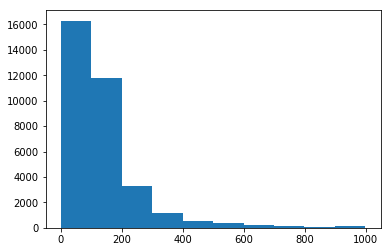

In [61]:
# Price layout
plt.hist(df_final['price'])

In [62]:
# Correlations with price
corr['price'].sort_values(ascending = False)

price                                           1.000000
cleaning_fee                                    0.680646
bedrooms                                        0.642138
accommodates                                    0.619298
bathrooms                                       0.521519
beds                                            0.465990
guests_included                                 0.458659
security_deposit                                0.224758
calculated_host_listings_count_entire_homes     0.198477
extra_people                                    0.198105
review_scores_location                          0.103997
availability_365                                0.097043
host_listings_count                             0.073979
host_total_listings_count                       0.073979
calculated_host_listings_count                  0.066868
availability_30                                 0.063450
review_scores_cleanliness                       0.050309
availability_60                

#### Price impressions

-  The distribution of price is skewed right with the average price per night being $140.  
-  The mean is higher than the median suggesting there is larger variation on the higher end of price.  
-  The top 5 contributors to price were cleaning fee, bedrooms, accommodates, bathrooms, bathrooms, and beds.
-  Price did not vary significantly over time.  Price had a general trend upwards.


### Occupancy Ratio

In [63]:
df_final['occupancy_ratio'].describe()

count    33989.000000
mean         0.532543
std          0.365832
min          0.000000
25%          0.139726
50%          0.578082
75%          0.865753
max          1.000000
Name: occupancy_ratio, dtype: float64

(array([7291., 2684., 1925., 1468.,  990., 3243., 1802., 3430., 3502.,
        7654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

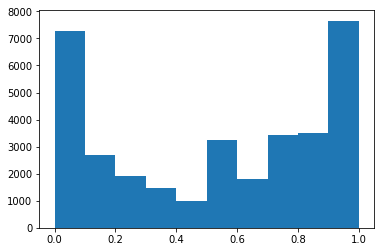

In [64]:
plt.hist(df_final['occupancy_ratio'])

In [65]:
corr['occupancy_ratio'].sort_values(ascending = False)

occupancy_ratio                                 1.000000
host_response_rate                              0.084393
review_scores_value                             0.080208
review_scores_accuracy                          0.070374
review_scores_rating                            0.063588
review_scores_communication                     0.059112
review_scores_checkin                           0.047129
host_since_days                                 0.025807
review_scores_cleanliness                       0.021153
review_scores_location                          0.015208
longitude                                      -0.004223
latitude                                       -0.008146
reviews_per_month                              -0.009384
minimum_maximum_nights                         -0.022186
maximum_nights_avg_ntm                         -0.022208
maximum_maximum_nights                         -0.022259
maximum_nights                                 -0.022264
minimum_minimum_nights         

#### Occupancy ratio impressions

The distribution of the occupancy ratio is bimodal with the peaks closer to 0 and 1 while the average was 53%.  The 25th and 75th percentile are 13.9% and 86.6%.  The biggest contributing factor is booking for multiple days in a row.   After that the next 5 contributors were host listings count, cleaning fee, price, number of reviews, a,d bathrooms.

### Review scores value

In [66]:
# for analysis of review_score_rating, we will removed columns directly contributing to review score
df_review_final = df_final.drop(['review_scores_accuracy', 'review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_location','review_scores_communication'], axis = 1)
review_corr = df_review_final.corr()

In [67]:
df_review_final['review_scores_rating'].describe()

count    33989.000000
mean        94.437848
std          8.368003
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

(array([1.1000e+02, 8.0000e+00, 5.6000e+01, 3.6000e+01, 1.5000e+01,
        3.4300e+02, 3.8600e+02, 1.4610e+03, 4.7310e+03, 2.6843e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

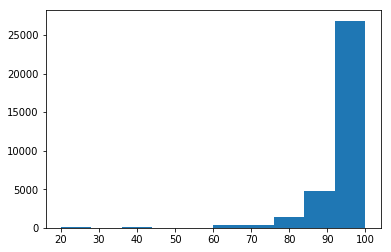

In [68]:
plt.hist(df_review_final['review_scores_rating'])

In [69]:
review_corr['review_scores_rating'].sort_values(ascending = False)

review_scores_rating                            1.000000
number_of_reviews_ltm                           0.081976
host_response_rate                              0.079454
reviews_per_month                               0.071054
number_of_reviews                               0.064604
occupancy_ratio                                 0.063588
security_deposit                                0.054829
price                                           0.048366
cleaning_fee                                    0.034394
latitude                                        0.027209
extra_people                                    0.026532
maximum_minimum_nights                          0.013495
minimum_nights_avg_ntm                          0.013192
minimum_nights                                  0.013096
minimum_minimum_nights                          0.011581
bedrooms                                        0.007897
guests_included                                -0.002964
minimum_maximum_nights         

#### Review scores value impression

The data is very heavily skewed left.  The average score is 94.4.  There were not any factors that strongly contributed to `review_scores_rating`.If we ignore the review scores that directly contribute the the calcuation of the review scores value, the top 5 contributors are related to  host_listings count, booking for multiple days, occupancy ratio, reviews per month, and beds.

In [70]:
# Additional correlation matrix to see if there is anything we may have missed
corr.style.background_gradient(cmap='coolwarm')

## Modeling

Here we will introduce a few functions to mainpulate model, and evaluate the models.

-  `find_optimal_lm_mod`: This function will use cutoff values to determine the optimal number of variables for the model and return the model and r2 scores. 
-  `coef_weights`: This function will return the coefficients with the strongest weights in each model.

### Funcitons

In [71]:
# Ref udacity AllTogether.py  in lessons
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.ylim(0,1)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

# Ref Udacity lesson 1 conc:4
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df



### Price

In [72]:
#Use the function to create X and y
X, y = clean_data(df_final,pred='price')    

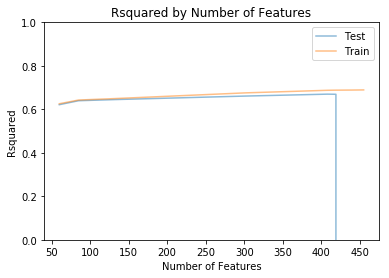

In [73]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [2500,1000, 500, 175, 120,115,110,105,100]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [74]:
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

0.6698473018862718
0.6875750255509094


In [75]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs,abs_coefs
378,"smart_location_Topanga, CA",-5.741736e+13,5.741736e+13
271,city_Topanga,5.741736e+13,5.741736e+13
381,"smart_location_West Hollywood, CA",4.957596e+13,4.957596e+13
274,city_West Hollywood,-4.957596e+13,4.957596e+13
376,"smart_location_Santa Monica, CA",-3.940505e+13,3.940505e+13
269,city_Santa Monica,3.940505e+13,3.940505e+13
254,city_Culver City,2.807449e+13,2.807449e+13
361,"smart_location_Culver City, CA",-2.807449e+13,2.807449e+13
270,city_Temple City,-2.326939e+13,2.326939e+13
377,"smart_location_Temple City, CA",2.326939e+13,2.326939e+13


In [76]:
cities_high = ['Malibu', 'Hawthorne', 'Santa Monica', 'Manhattan Beach', 'Torrance', 'Culver City', 'Venice', 'Alhambra']
cities_low = ['West Hollywood', 'Redondo Beach', 'Altadena', 'Burbank', 'Topanga', 'San Gabriel','Hacienda Heights', 'Monterey Park', 'Glandale', 'Temple City', 'Inglewood']

cities_avg_high = []
cities_avg_low = []

for city in cities_high:
    cities_avg_high.append(df_final[df_final['city']==city]['price'].mean())
    
for city in cities_low:
    cities_avg_low.append(df_final[df_final['city']==city]['price'].mean())    


In [77]:
df_final[df_final['city']=='Hawthorne']['price'].describe()

count    137.000000
mean      82.328467
std       51.923319
min       19.000000
25%       55.000000
50%       70.000000
75%       99.000000
max      400.000000
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

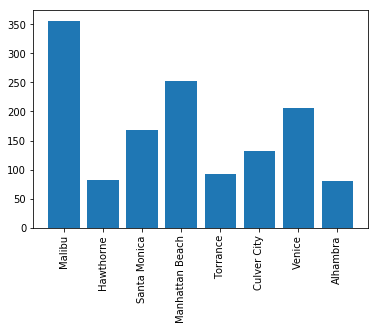

In [78]:
plt.bar(cities_high,cities_avg_high)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

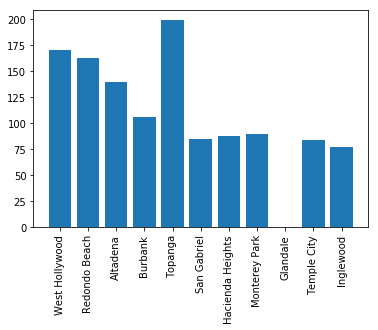

In [79]:
plt.bar(cities_low,cities_avg_low)
plt.xticks(rotation='vertical')

### Price modeling impressions

-  The strongest predictor of price is location(`city`, `neighborhood`, and `smart location`).
    - Higher price by `city`:  [Malibu, Hawthorne, Santa Monica, Manhattan Beach, Torrance, Culver City, Venice, Alhambra]
    - Lower price by `city`:  [West Hollywood, Redondo Beach, Altadena, Burbank, Topanga, San Gabriel, Hacienda Heights, Monterey Park, Glandale, Temple City, Inglewood]
    - Lower price by `neighbourhood`: Torrance
    - Smart location had an opposite effect of the city it was in.
-  The next most significant predictor was related to host listings count.
    - `host_listings_count`, `calculated_host_listings_count_shared_rooms`, and `calculated_host_listings_count_private_rooms` had a negative impact on price.
    - `host_total_listings_count` and `calculated_host_listings_count`, had a positive impact on price


### Occupancy ratio

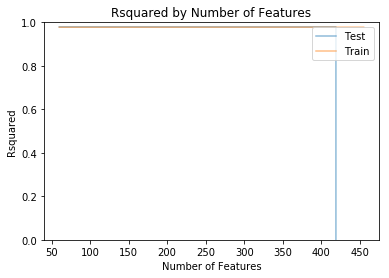

In [80]:
#Use the function to create X and y
X, y = clean_data(df_final,pred='occupancy_ratio') 
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [81]:
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

0.9792883696325603
0.9776190637341827


In [82]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
2,host_total_listings_count,1.484492e+08,1.484492e+08
1,host_listings_count,-1.484492e+08,1.484492e+08
37,calculated_host_listings_count_shared_rooms,3.018069e+07,3.018069e+07
34,calculated_host_listings_count,-3.018069e+07,3.018069e+07
35,calculated_host_listings_count_entire_homes,3.018069e+07,3.018069e+07
36,calculated_host_listings_count_private_rooms,3.018069e+07,3.018069e+07
53,neighbourhood_Long Beach,9.963272e-02,9.963272e-02
59,neighbourhood_cleansed_Long Beach,-9.559662e-02,9.559662e-02
51,neighbourhood_Downtown,1.553283e-02,1.553283e-02
57,neighbourhood_cleansed_Downtown,-1.444836e-02,1.444836e-02


### Occupancy ratio modeling impressions

-  The strongest predictors were related to host listings count. 
    - `host_total_listings_count` and `calculated_host_listings_count` had a positive impact on occupancy ratio.
    -  `host_listings_count`, `calculated_host_listings_count_private_rooms`, `calculated_host_listings_count_entire_homes` and `calculated_host_listings_count_shared_rooms` had a negative impact on occupancy ratio.


### Review scores rating

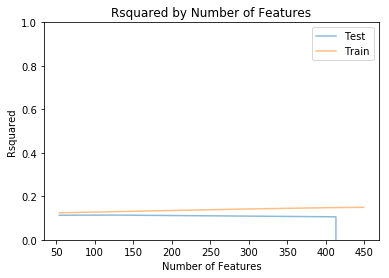

In [83]:
#Use the function to create X and y
X, y = clean_data(df_review_final,pred='review_scores_rating') 
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [84]:
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

0.11359820414860389
0.12950798722192924


In [85]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
107,"smart_location_Santa Monica, CA",-5.095514e+12,5.095514e+12
87,city_Santa Monica,5.095514e+12,5.095514e+12
108,"smart_location_West Hollywood, CA",1.071973e+12,1.071973e+12
88,city_West Hollywood,-1.071973e+12,1.071973e+12
1,host_listings_count,4.246946e+10,4.246946e+10
2,host_total_listings_count,-4.246946e+10,4.246946e+10
27,calculated_host_listings_count,-2.776011e+10,2.776011e+10
28,calculated_host_listings_count_entire_homes,2.776011e+10,2.776011e+10
30,calculated_host_listings_count_shared_rooms,2.776011e+10,2.776011e+10
29,calculated_host_listings_count_private_rooms,2.776011e+10,2.776011e+10


### Review scores rating modeling impressions

-  Due to how hevily skewed the `review_scores_rating` data is, the modeling was not able to accurately predict.
-  The strongest predictors of review scores are related to host listings count and location.

In [86]:
# See what `host_listings_count` looks like
df_final['host_listings_count'].describe()

count    33989.000000
mean         8.128571
std         36.336259
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        852.000000
Name: host_listings_count, dtype: float64

# Visualizations

## Distributions

#### Price

(array([16292., 11761.,  3283.,  1187.,   546.,   374.,   207.,   134.,
          101.,   104.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

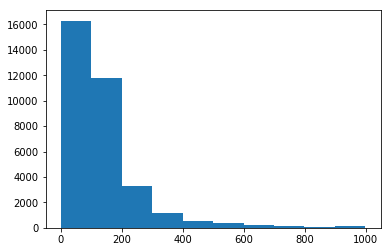

In [87]:
# Price layout
plt.hist(df_final['price'])

#### Occupancy Ratio

(array([7291., 2684., 1925., 1468.,  990., 3243., 1802., 3430., 3502.,
        7654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

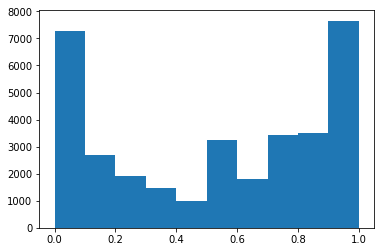

In [88]:
plt.hist(df_final['occupancy_ratio'])

#### Review Score Ratings

(array([1.1000e+02, 8.0000e+00, 5.6000e+01, 3.6000e+01, 1.5000e+01,
        3.4300e+02, 3.8600e+02, 1.4610e+03, 4.7310e+03, 2.6843e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

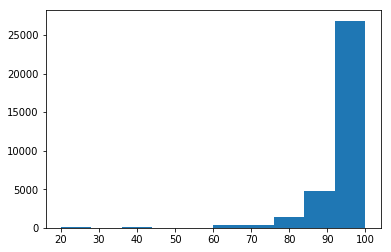

In [89]:
plt.hist(df_final['review_scores_rating'])

### Price over time

Text(0.5,1,'Unit Price Over a Year')

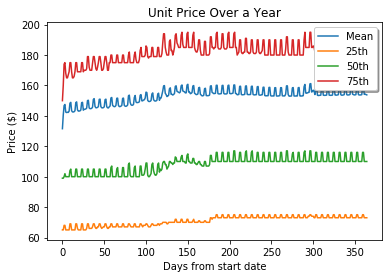

In [90]:
# Plot price over time
fig, ax = plt.subplots()
lines = ax.plot(daily_stats)
ax.legend(('Mean', '25th','50th','75th'), loc='upper right', shadow=True)
ax.set_xlabel('Days from start date')
ax.set_ylabel('Price ($)')
ax.set_title('Unit Price Over a Year')

#### Additional Visualizations

Additional visualizations will be created in rmarkdown file `r_airbnb_la.rmd`

# Summary

## Price

-  The price did not change based on season but had a small trend up.
-  The distribution of price is skewed right.
-  The mean is higher than the median suggesting there is larger variation on the higher end of price.  
-  The top 5 contributors to price were cleaning fee, bedrooms, accommodates, bathrooms, bathrooms, and beds.
-  The strongest predictor of price is location(`city`, `neighborhood`, and `smart location`).
    - Higher price by `city`:  [Malibu, Hawthorne, Santa Monica, Manhattan Beach, Torrance, Culver City, Venice, Alhambra]
    - Lower price by `city`:  [West Hollywood, Redondo Beach, Altadena, Burbank, Topanga, San Gabriel, Hacienda Heights, Monterey Park, Glandale, Temple City, Inglewood]
-  The number of host listings was also a significant predictor of price
    
    



## Occupancy Ratio

-  The distribution of the occupancy ratio is bimodal with the peaks closer to 0 and 1 while the average was 53%.  
-  The biggest contributing factor is booking for multiple days in a row.   
-  The next 5 contributors were host listings count, cleaning fee, price, number of reviews, and bathrooms.
-  The strongest predictors were related to host listings count. 
    - `host_total_listings_count` and `calculated_host_listings_count` had a positive impact on occupancy ratio.
    -  `host_listings_count`, `calculated_host_listings_count_private_rooms`, `calculated_host_listings_count_entire_homes` and `calculated_host_listings_count_shared_rooms` had a negative impact on occupancy ratio.




## Review Scores

-  The data is very heavily skewed left.  
-  The average score is 94.4.  
-  Due to how hevily skewed the `review_scores_rating` data is, the modeling and analysis were not able to accurately predict or determine contributing factors.
-  The strongest predictors of review scores are related to host listings count and location.